#####  Analysis of patient's(Heart) data:

The project is breifly about the analysis of heart disease data. The dataset is taken from kaggel. The dataset contains 914 instances and 12 attributes. The attributes- _Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease_.
The dataset is used to predict whether a patient has heart disease or not. The analysis includes data preprocessing, exploratory data analysis, and building machine learning models to predict heart disease.

In [25]:
#importing the librearies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Here the categorical featureas are _Sex,CHestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease_ and the numerical features are _Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak_.
In the dataset all the categorical features has object datatype except _HeartDisease_ which has int datatype. The numerical features has int or float datatype.

##### Data Cleaning

In [28]:

#Checking the data conrtains null value
print(df.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [29]:
def max_val(val):
    return df[val].max()

In [30]:
def min_val(val):
    return df[val].min()

In [31]:
#So there is no null value
#We will check the maximum and minimum values of each numerical feaures
print(f"Maximum value of Age is {max_val('Age')} and Minimum value is {min_val('Age')}")
print(f"Maximum value of RestingBP is {max_val('RestingBP')} and Minimum value is {min_val('RestingBP')}")
print(f"Maximum value of Cholesterol level is {max_val('Cholesterol')} and Minimum value is {min_val('Cholesterol')}")
print(f"Maximum value of FastingBS is {max_val('FastingBS')} and Minimum value is {min_val('FastingBS')}")
print(f"Maximum value of MaxHR is {max_val('MaxHR')} and Minimum value is {min_val('MaxHR')}")
print(f"Maximum value of Oldpeak is {max_val('Oldpeak')} and Minimum value is {min_val('Oldpeak')}")

Maximum value of Age is 77 and Minimum value is 28
Maximum value of RestingBP is 200 and Minimum value is 0
Maximum value of Cholesterol level is 603 and Minimum value is 0
Maximum value of FastingBS is 1 and Minimum value is 0
Maximum value of MaxHR is 202 and Minimum value is 60
Maximum value of Oldpeak is 6.2 and Minimum value is -2.6


From the maximum and munimum values  of the numerical features, We can see theat there are some value problem in our dataset. The _RestingBP_, _Cholesterol_,_MaxHR_ has minimum value of 0 which is not possible. The _Oldpeak_ has minimum value of -2.6 which is not possible. So, we have options to either remove those rows or replae them with the mean or median of the respective columns. Since, the dataset is not too large, we will replace those values with the median of the respective columns.

In [32]:
median_bp = df[df['RestingBP'] != 0]['RestingBP'].median()
median_cholesterol=df[df['Cholesterol']!=0]['Cholesterol'].median();
median_hr = df[df['MaxHR'] != 0]['MaxHR'].median()
median_oldpeak = df[df['Oldpeak'] >= 0]['Oldpeak'].median()
df['RestingBP']=df['RestingBP'].replace(0,median_bp);
df['Cholesterol']=df['Cholesterol'].replace(0,median_cholesterol);
df['MaxHR']=df['MaxHR'].replace(0,median_hr);
df['Oldpeak']=df['Oldpeak'].apply(lambda x:median_oldpeak if x<0 else x )

In [33]:
#test the min's
print(min_val('RestingBP'),min_val('Cholesterol'),min_val('Oldpeak'))


80 85 0.0


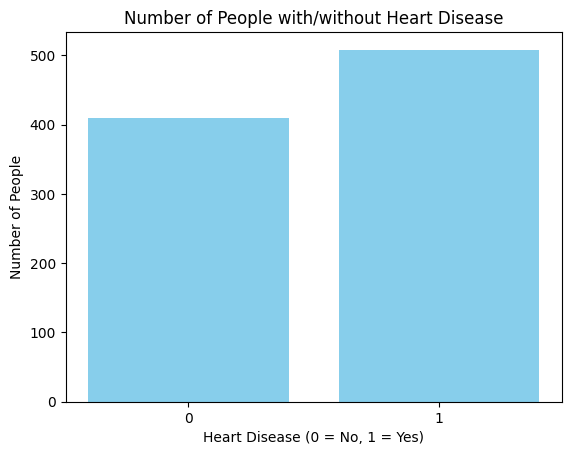

In [37]:
person_with_disease = df['HeartDisease'].value_counts().sort_index()
plt.bar(person_with_disease.index.astype(str), person_with_disease.values, color='skyblue')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.title('Number of People with/without Heart Disease')
plt.show()


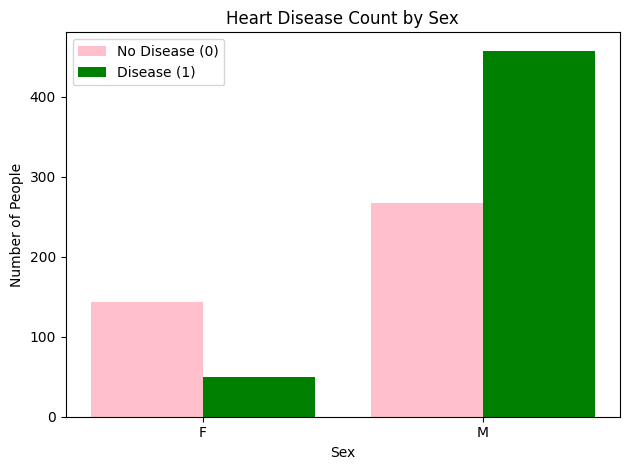

In [54]:
age_distribution = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
x = np.arange(len(age_distribution.index))
plt.bar(x - 0.2, age_distribution[0], width=0.4, label='No Disease (0)', color='pink')
plt.bar(x + 0.2, age_distribution[1], width=0.4, label='Disease (1)', color='green')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.title('Heart Disease Count by Sex')
plt.xticks(x, age_distribution.index.astype(str))  # Convert index to str for labels
plt.legend()
plt.tight_layout()
plt.show()

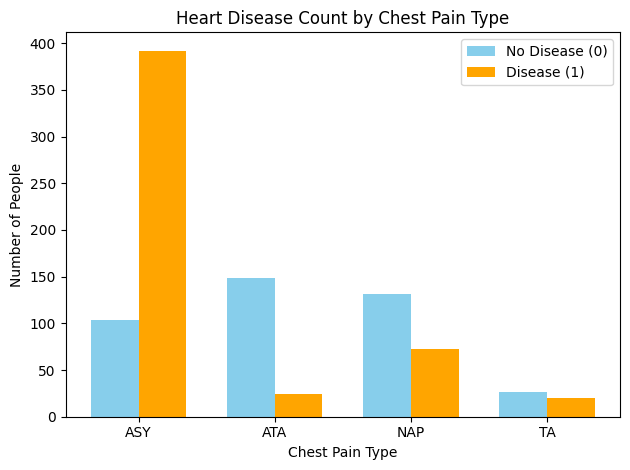

In [50]:

grouped = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
x = np.arange(len(grouped.index))  
width = 0.35 
plt.bar(x - width/2, grouped[0], width, label='No Disease (0)', color='skyblue')
plt.bar(x + width/2, grouped[1], width, label='Disease (1)', color='orange')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of People')
plt.title('Heart Disease Count by Chest Pain Type')
plt.xticks(x, grouped.index)  
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


array([0, 1, 2, 3])